## **MY SPOTIFY PLAYLIST DATA ANALYSIS**

Elifsu Gökduman 29543

In [1]:
pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 4.0 MB/s eta 0:00:00


In [2]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import requests
import time

In [3]:
client_id = "d3732e41af93436a9e30b5c70f3a30cd"
client_secret = "9d105e347f0e418a96e18ba65ce964fe"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
# Getting Access
AUTH_URL = 'https://accounts.spotify.com/api/token'
# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [5]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [8]:
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

playlist_id = '0gqrnk12Q8OExuCeKyBRCq' #My Calm Before the storm playlist
# extract all albums
r = requests.get(BASE_URL + 'playlists/' + playlist_id + '/tracks',
                 headers=headers,
                 params={'limit': 100})
d = r.json()
print(d)

{'href': 'https://api.spotify.com/v1/playlists/0gqrnk12Q8OExuCeKyBRCq/tracks?offset=0&limit=100', 'items': [{'added_at': '2017-04-19T18:49:17Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/abelmariamusic'}, 'href': 'https://api.spotify.com/v1/users/abelmariamusic', 'id': 'abelmariamusic', 'type': 'user', 'uri': 'spotify:user:abelmariamusic'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0PFtn5NtBbbUNbU9EAmIWF'}, 'href': 'https://api.spotify.com/v1/artists/0PFtn5NtBbbUNbU9EAmIWF', 'id': '0PFtn5NtBbbUNbU9EAmIWF', 'name': 'TOTO', 'type': 'artist', 'uri': 'spotify:artist:0PFtn5NtBbbUNbU9EAmIWF'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO',

In [9]:
trackinfo = []   # will hold all track info
tracks = [] # to keep track of duplicates
audiofeatures = []
# loop over albums and get all tracks
for track in d['items']:
    track = track['track']
    track_name = track['name']


    trim_name = track_name.split('(')[0].strip()

    tracks.append(trim_name.upper()) # use upper() to standardize

    # this takes a few seconds so let's keep track of progress
    f = requests.get(BASE_URL + 'tracks/' + track['id'],
                            headers=headers)
    f = f.json()


    trackinfo.append(f)

    f = requests.get(BASE_URL + 'audio-features/' + track['id'],
            headers=headers)
    f = f.json()

    audiofeatures.append(f)

In [10]:
df = pd.DataFrame(trackinfo)


In [11]:
df2= pd.DataFrame(audiofeatures)

In [12]:
result = pd.merge(df, df2, on='id')


In [13]:
result['duration_ms_x'] = pd.to_datetime(result['duration_ms_x'], unit='ms').dt.strftime('%H:%M:%S')

In [14]:
result['duration_ms_y'] = pd.to_datetime(result['duration_ms_y'], unit='ms').dt.strftime('%H:%M:%S')

In [15]:
result = result[['album','artists', 'disc_number', 'duration_ms_x', 'explicit', 'href', 'id', 'is_local', 'name', 'popularity','track_number','type_x','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','type_y','uri_y','duration_ms_y','time_signature']]

In [16]:
result['album_name'] = result['album'].apply(lambda x: x['name'] if pd.notnull(x) else None)


In [17]:
result = result.drop(columns=['album'])


In [18]:
result['artist_name'] = result['artists'].apply(lambda x: x[0]['name'] if x and isinstance(x, list) and len(x) > 0 and isinstance(x[0], dict) else None)


In [19]:
result = result.drop(columns=['artists'])

In [20]:
result.to_csv("myDataPlaylist2.csv", sep = ',')

## Exploratory Data Analysis

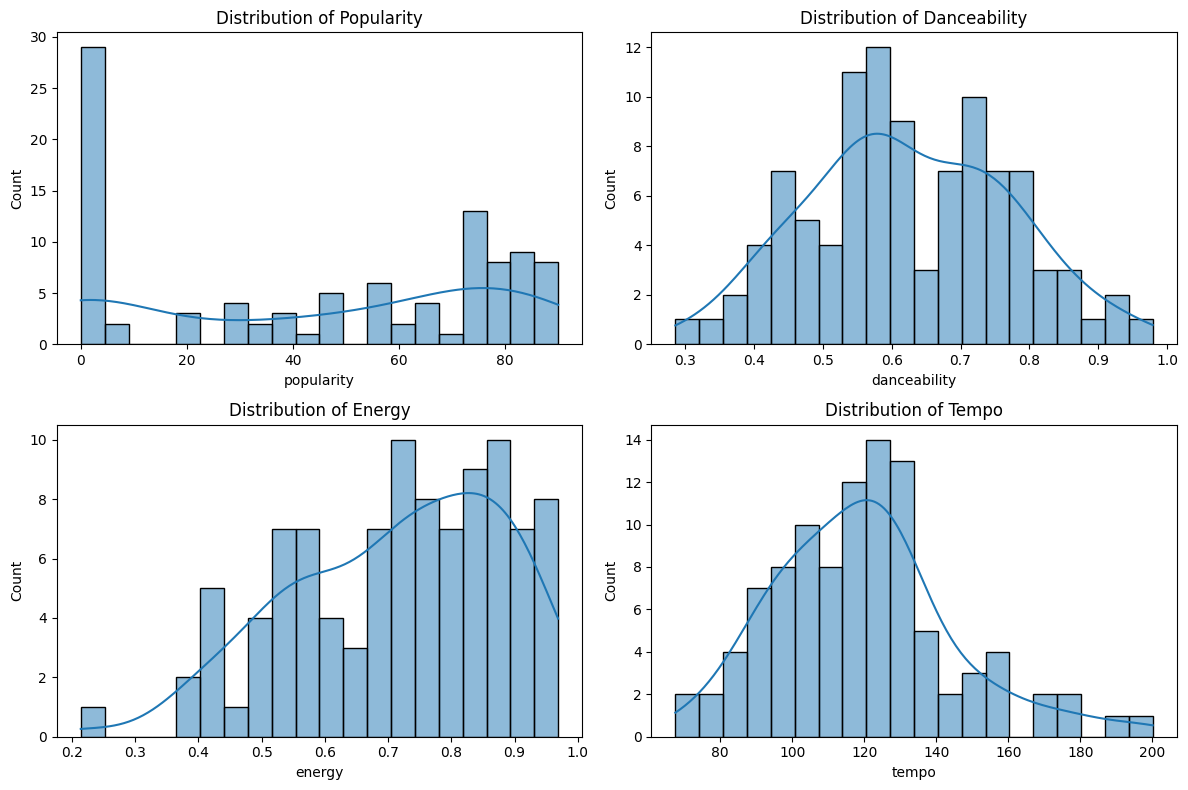

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
filename= 'myDataPlaylist2.csv'

spotify_data = pd.read_csv(filename)

duplicates = spotify_data.duplicated().sum()
missing_values = spotify_data.isnull().sum()

summary_statistics = spotify_data.describe()

plt.figure(figsize=(12, 8))
for i, feature in enumerate(['popularity', 'danceability', 'energy', 'tempo']):
    plt.subplot(2, 2, i+1)
    sns.histplot(spotify_data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')

plt.tight_layout()
plt.show()

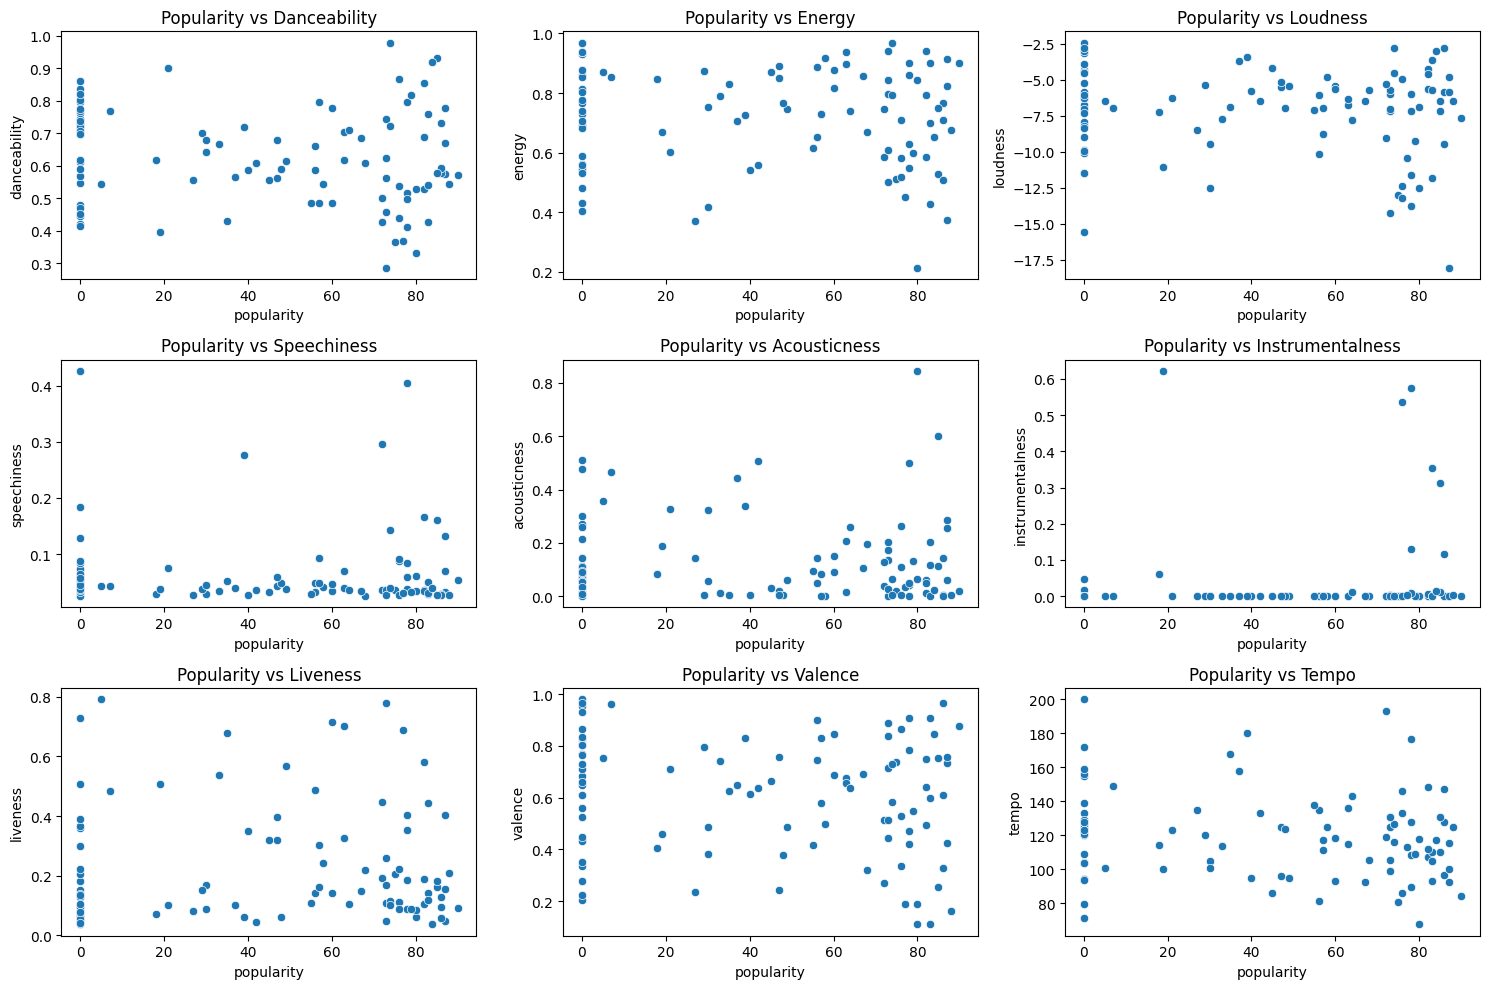

In [22]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_cols):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=spotify_data['popularity'], y=spotify_data[feature])
    plt.title(f'Popularity vs {feature.capitalize()}')

plt.tight_layout()
plt.show()

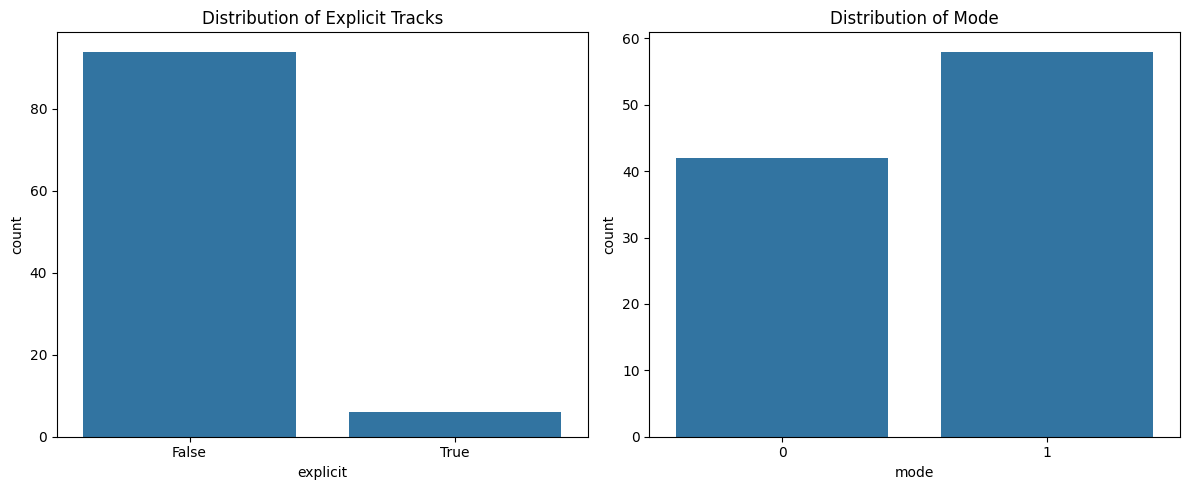

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=spotify_data['explicit'], ax=axes[0])
axes[0].set_title('Distribution of Explicit Tracks')

sns.countplot(x=spotify_data['mode'], ax=axes[1])
axes[1].set_title('Distribution of Mode')

plt.tight_layout()
plt.show()


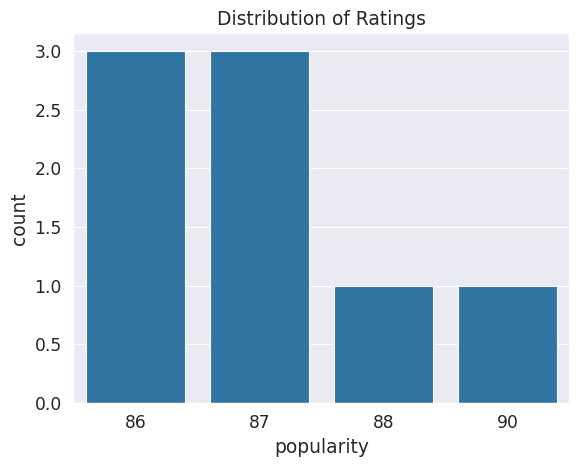

In [24]:
from matplotlib import cm
import seaborn as sn
pop = result.loc[result["popularity"] > 85]

sn.set_style("darkgrid")
sn.set_context("paper",font_scale = 1.4)
sn.countplot(x = pop["popularity"]).set_title('Distribution of Ratings');


<ipython-input-25-863e5049f9e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = pop.corr()


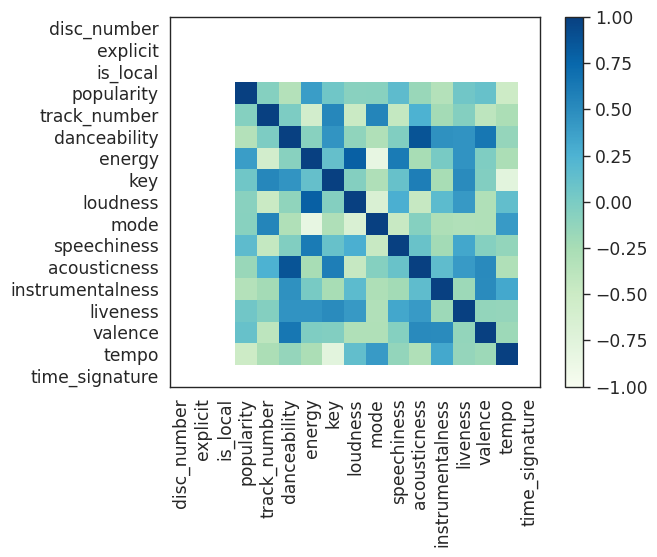

In [25]:
sn.set_style("white")
corrs = pop.corr()
plt.imshow(corrs, cmap="GnBu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=90)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()

# Machine Learning

K-Mean Clustering

In [33]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('myDataPlaylist2.csv')

# Selecting common Spotify audio features
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creating the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Assigning the cluster labels to each row in DataFrame
df['cluster'] = kmeans.labels_

# Displaying the first few rows with cluster labels
print(df.head())


   Unnamed: 0  disc_number duration_ms_x  explicit  \
0           0            1      00:04:55     False   
1           1            1      00:05:10     False   
2           2            1      00:03:34     False   
3           3            1      00:03:28     False   
4           4            1      00:05:31     False   

                                                href                      id  \
0  https://api.spotify.com/v1/tracks/2374M0fQpWi3...  2374M0fQpWi3dLnB54qaLX   
1  https://api.spotify.com/v1/tracks/3MrRksHupTVE...  3MrRksHupTVEQ7YbA0FsZK   
2  https://api.spotify.com/v1/tracks/5vdp5UmvTsnM...  5vdp5UmvTsnMEMESIF2Ym7   
3  https://api.spotify.com/v1/tracks/2zYzyRzz6pRm...  2zYzyRzz6pRmhPzyfMEC8s   
4  https://api.spotify.com/v1/tracks/37BTh5g05cxB...  37BTh5g05cxBIRYMbw8g2T   

   is_local                                          name  popularity  \
0     False                                        Africa          87   
1     False                           The Final 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Linear Regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('myDataPlaylist2.csv')

# Selecting common Spotify audio features and the target variable 'popularity'
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]
y = df['popularity']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 1744.0635000903408
R^2 Score: -0.6950044221000253
